In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords, words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')

print(df.head)


<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [ ]:
# Dataset Shape and Info
print("\nDataset Shape:\n", df.shape)
print("\nDataset Info:\n")
print(df.info())



Dataset Shape:
 (5572, 5)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [ ]:
# Rename relevant columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Drop unnecessary unnamed columns
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True)


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Define English words and stopwords
english_words = set(words.words())
stop_words = set(stopwords.words('english'))
custom_stopwords = {"com", "ect", "hou", "pm", "cc", "corp", "enron", "company",
                    "please", "email", "business", "subject", "information", "us"}

In [ ]:
# Clean text
def clean_text(message):
    if pd.isna(message):
        return ""
    message = re.sub(r'(?i)subject:', '', message)
    message = re.sub(r'\bn\w+', '', message)
    message = message.lower()
    message = re.sub(r'\W', ' ', message)
    message = re.sub(r'\d+', '', message)
    message = re.sub(r'\s+', ' ', message).strip()
    words_list = message.split()
    message = ' '.join([word for word in words_list if word in english_words and word not in stop_words and word not in custom_stopwords])
    return message

In [ ]:
# Apply cleaning
df['cleaned_message'] = df['message'].apply(clean_text)

In [ ]:
# Encode target
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


<ipython-input-81-167383ca7f7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_num', data=df, palette='viridis')


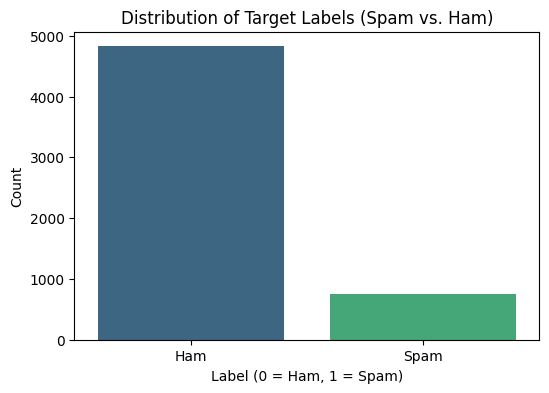

In [ ]:
# Target Variable Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='label_num', data=df, palette='viridis')
plt.title('Distribution of Target Labels (Spam vs. Ham)')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['label_num'], test_size=0.2, random_state=42)


In [ ]:
# Vectorize text using CountVectorizer
cv = CountVectorizer(max_features=4000, stop_words='english', ngram_range=(1, 3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
# Train Random Forest Classifier with class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # handles class imbalance
)

rf_model.fit(X_train_cv, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict and evaluate
y_pred = rf_model.predict(X_test_cv)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       949
           1       0.94      0.78      0.85       166

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Accuracy Score: 0.9596


In [ ]:
import joblib


In [ ]:
# Save model
joblib.dump(rf_model, '/content/rf_model.pkl')

# Save vectorizer
joblib.dump(cv, '/content/count_vectorizer.pkl')


['/content/count_vectorizer.pkl']


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       949
           1       0.94      0.78      0.85       166

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.91      1115
weighted avg       0.96      0.96      0.96      1115



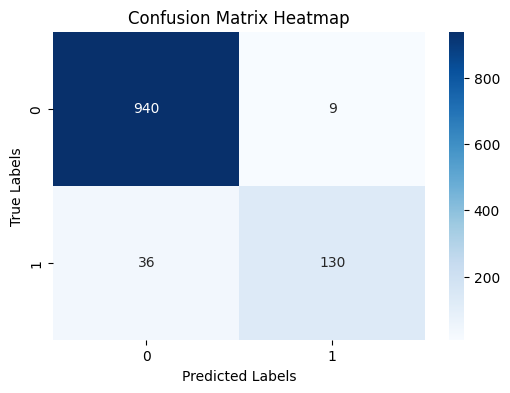

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred = rf_model.predict(X_test_cv)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
